In [5]:
import numpy as np  
import pandas as pd 

In [6]:
# Reading data
url = 'https://raw.githubusercontent.com/rachelnguyen2001/Credit_Card_Visualization/main/BankChurners.csv'
df = pd.read_csv(url)
print('Data reading succeeds!')

Data reading succeeds!


In [7]:
# First five columns in data
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [8]:
# Number of rows and columns in the data set
print(df.shape)

(10127, 23)


We will drop the first column (CLIENTNUM) and the two last columns regarding Naive Bayes Classifier since they are irrelevant to our analysis.

In [9]:
# Clean data
df.drop(df.columns[[0, len(df.columns) - 1, len(df.columns) - 2]], axis = 1, inplace = True)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Next, we will extract interesting information regarding the data set, for example, the avergae age of the customers,

In [10]:
# Get the average of customers' age
round(df["Customer_Age"].mean(), 0)

46.0

or the average number of dependents.

In [11]:
# Get the average number of dependents
round(df["Dependent_count"].mean(), 0)

2.0

In fact, we can extract such information across all columns.

In [12]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Let's do some visualization.

In [13]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

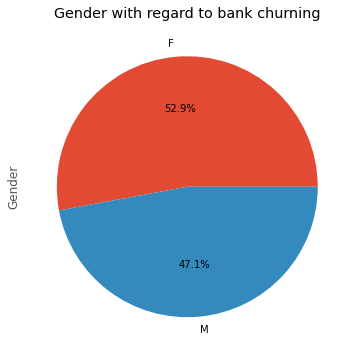

In [14]:
# A pie chart showing the percentage of male and female customers in the data set
df['Gender'].value_counts().plot(kind='pie',
                                    figsize=(10,6),
                                    autopct='%1.1f%%',
                                    title="Gender with regard to bank churning")
plt.show()

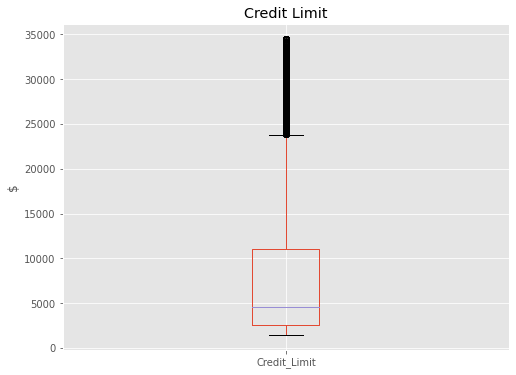

In [16]:
# A box plot showing the customers' credit limit
df['Credit_Limit'].plot(kind='box', figsize=(8, 6))

plt.title('Credit Limit')
plt.ylabel('$')

plt.show()

Let's do some more sophisticated analysis across different variables. First, we will explore the number of existing and attrited customers across five other categorical variables in our data set.

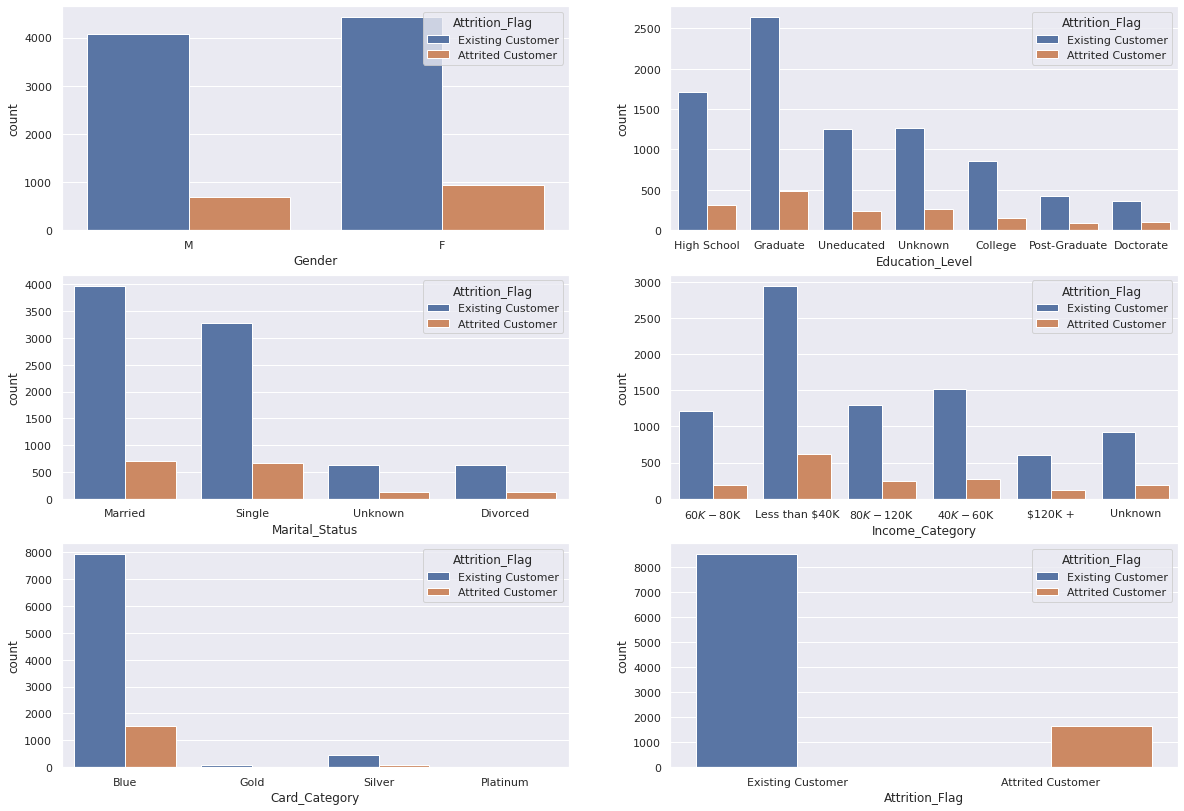

In [36]:
import seaborn as sns

sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(3, 2, figsize=(20, 14))

# Countplots for Attrition_Flag with respect to five other categorical variables in the data set
sns.countplot(ax=axes[0, 0],x=df['Gender'],hue=df['Attrition_Flag'])
sns.countplot(ax=axes[0, 1], x=df['Education_Level'], hue=df['Attrition_Flag'])
sns.countplot(ax=axes[1, 0], x=df['Marital_Status'], hue=df['Attrition_Flag'])
sns.countplot(ax=axes[1, 1], x=df['Income_Category'], hue=df['Attrition_Flag'])
sns.countplot(ax=axes[2, 0], x=df['Card_Category'], hue=df['Attrition_Flag'])
sns.countplot(ax=axes[2, 1], x=df['Attrition_Flag'], hue=df['Attrition_Flag'])

We can also do some more in-depth analysis by seeing the correlation between variables.

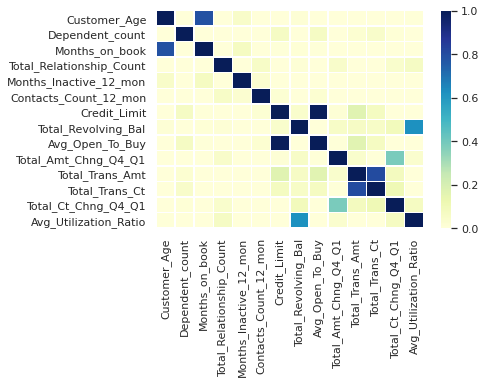

In [40]:
sns.heatmap(df.corr(), linewidths=0.5, vmin=0, vmax=1, cmap="YlGnBu")